# Drillhole EDA

10% of the entire data

From Trevor: Sample data points for any particular drill hole will be co-located on a map. An assumption of sample co-location for each drill hole is adequate for our purpose although in reality some will have been drilled inclined rather than straight vertically. 

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataframe info

In [252]:
df = pd.read_csv('dd_20210723_sample_10pct.csv')
df.head()

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
0,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.60,79089,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,82.0,-9999.0,8.0,-9999.0
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [253]:
df.shape

(856405, 172)

There are 856,405 rows and 172 columns. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856405 entries, 0 to 856404
Columns: 172 entries, Unnamed: 0 to ZrO2_PPM
dtypes: float64(140), int64(29), object(3)
memory usage: 1.1+ GB


140 columns are floats, 29 are ints and only 3 are objects (CompanyHoleId, Hole Type and 1 more). 

### NAs

In [8]:
col_nas = df.isna().sum() 

In [9]:
col_nas[col_nas > 0] 

MaxDepth           50481
CompanySampleId    30232
dtype: int64

Only two columns have NAs, and they're not of interest to us for now. 

In [11]:
row_nas = df.isna().sum(axis=1)

In [18]:
row_nas[row_nas == 1].count()

67843

In [19]:
row_nas[row_nas == 2].count()

6435

In [20]:
row_nas[row_nas > 2].count()

0

No rows have more than 2 NAs

### Negative values

From Trevor: "You will find that the geochemical data set contains a large proportion of “null” values and assorted negative numbers. I suggest that for the purpose of this study, only consider using data where there are positive (i.e. > 0) values for the  elements of interest. Ignore values indicating “below detection” – we can’t be sure that replacing these with the half of the absolute value” will not unduly bias the “association” analyses. Hopefully you will still be left with enough data to work with."

In [64]:
#number of rows where Zn is negative
df[df['Zn_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
5,7611405,3524508,NEMJRD9957W1,120.597732,-26.391069,DD,360,-90,262.13,101572,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856399,438141,358919,YUG064,118.838935,-28.610698,DD,360,-90,128.60,74594,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [23]:
#number of rows where Cu is negative
df[df['Cu_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
5,7611405,3524508,NEMJRD9957W1,120.597732,-26.391069,DD,360,-90,262.13,101572,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856399,438141,358919,YUG064,118.838935,-28.610698,DD,360,-90,128.60,74594,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [24]:
#number of rows where Ni is negative
df[df['Ni_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
5,7611405,3524508,NEMJRD9957W1,120.597732,-26.391069,DD,360,-90,262.13,101572,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856402,791301,562730,CLD183,122.216975,-26.911738,DD,360,-90,407.90,74928,...,-9999,-9999.0,1.9,-9999.0,-9999.0,-9999.0,54.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [25]:
#number of rows where Co is negative
df[df['Co_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
5,7611405,3524508,NEMJRD9957W1,120.597732,-26.391069,DD,360,-90,262.13,101572,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856399,438141,358919,YUG064,118.838935,-28.610698,DD,360,-90,128.60,74594,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [26]:
#number of rows where In is negative
df[df['In_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
0,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.60,79089,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,82.0,-9999.0,8.0,-9999.0
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856402,791301,562730,CLD183,122.216975,-26.911738,DD,360,-90,407.90,74928,...,-9999,-9999.0,1.9,-9999.0,-9999.0,-9999.0,54.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [27]:
#number of rows where In is negative
df[df['Ge_PPM'] < 0]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
0,1421455,868290,AMD352,120.573672,-27.606633,DD,360,-90,338.60,79089,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,82.0,-9999.0,8.0,-9999.0
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856402,791301,562730,CLD183,122.216975,-26.911738,DD,360,-90,407.90,74928,...,-9999,-9999.0,1.9,-9999.0,-9999.0,-9999.0,54.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


There are 674451 rows that have negative values for all the CMs of interest. We only keep positive values. 

In [31]:
df.loc[(df['Ge_PPM'] < 0) & (df['In_PPM'] < 0) & (df['Co_PPM'] < 0)]

,Unnamed: 0,CollarId,CompanyHoleId,Longitude,Latitude,HoleType,Azimuth,Dip,MaxDepth,Anumber,...,WO_PPM,WO3_PPM,Y_PPM,Y2O3_PPM,Yb_PPM,Yb2O3_PPM,Zn_PPM,ZnO_PPM,Zr_PPM,ZrO2_PPM
1,2127794,1113830,NEMJRD9583,120.598003,-26.383791,DD,360,-90,1099.05,81539,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2628642,1277942,GCMCOBCD50,120.940469,-27.426364,DD,360,-90,399.00,62231,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,7269457,3418074,CRD113,121.229805,-30.708203,DD,360,-90,848.00,61246,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,237760,233053,GSD359,122.414937,-28.805433,DD,360,-90,543.50,66814,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
5,7611405,3524508,NEMJRD9957W1,120.597732,-26.391069,DD,360,-90,262.13,101572,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856399,438141,358919,YUG064,118.838935,-28.610698,DD,360,-90,128.60,74594,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856400,5572638,2659184,NHUG0033,120.497193,-27.985881,DD,360,-90,186.93,61309,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856401,4094110,1989988,VD11_31,121.565023,-30.615752,DD,360,-90,930.20,94524,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
856403,2103898,1093873,TWDD0286,121.330154,-28.895726,DD,360,-90,588.10,81260,...,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [259]:
df = df.loc[(df['Ge_PPM'] >= 0) | (df['In_PPM'] >= 0) | (df['Co_PPM'] >= 0)]
df.shape

(181863, 172)

Only 181954 have at least one of the minerals we want. 

### Number ranges

Some really high maximums there. But also most values are around 0. 

In [45]:
import seaborn as sns

In [37]:
df[df['Ge_PPM'] >=0]['Ge_PPM'].describe()

count    9553.000000
mean        0.759828
std         1.613325
min         0.000000
25%         0.160000
50%         0.300000
75%         1.000000
max        57.100000
Name: Ge_PPM, dtype: float64

<AxesSubplot:>

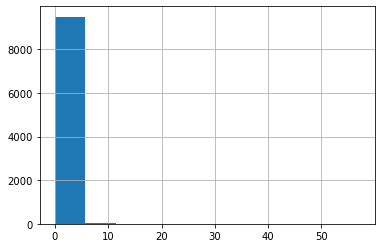

In [40]:
df[df['Ge_PPM'] >=0]['Ge_PPM'].hist()

<AxesSubplot:ylabel='Ge_PPM'>

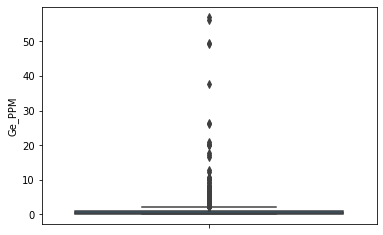

In [50]:
sns.boxplot(y = df[df['Ge_PPM'] >=0]['Ge_PPM'])

In [38]:
df[df['In_PPM'] >=0]['In_PPM'].describe()

count     13158.000000
mean         25.273872
std        1593.114359
min           0.000000
25%           0.029000
50%           0.050000
75%           0.080000
max      113000.000000
Name: In_PPM, dtype: float64

Range seems reasonable

<AxesSubplot:>

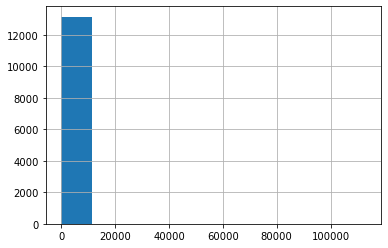

In [41]:
df[df['In_PPM'] >=0]['In_PPM'].hist()

<AxesSubplot:ylabel='In_PPM'>

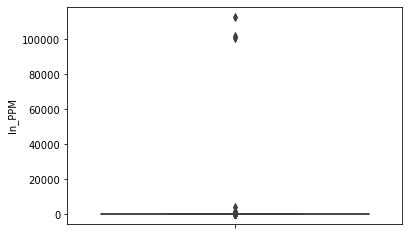

In [51]:
sns.boxplot(y = df[df['In_PPM'] >=0]['In_PPM'])

In [39]:
df[df['Co_PPM'] >=0]['Co_PPM'].describe()

count    1.809240e+05
mean     3.036314e+03
std      1.831804e+05
min      0.000000e+00
25%      1.300000e+01
50%      4.610000e+01
75%      1.000000e+02
max      3.340000e+07
Name: Co_PPM, dtype: float64

<AxesSubplot:>

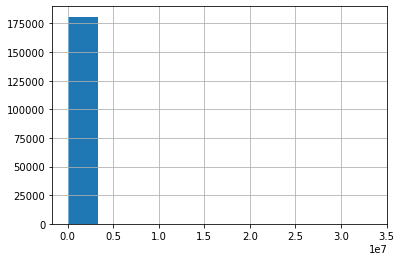

In [42]:
df[df['Co_PPM'] >=0]['Co_PPM'].hist()

<AxesSubplot:ylabel='Co_PPM'>

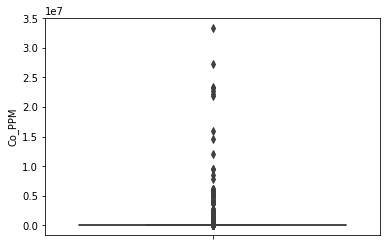

In [52]:
sns.boxplot(y = df[df['Co_PPM'] >=0]['Co_PPM'])

In [260]:
#only keep values of Co lower than 1million
df = df[df['Co_PPM'] < 1000000]

<AxesSubplot:>

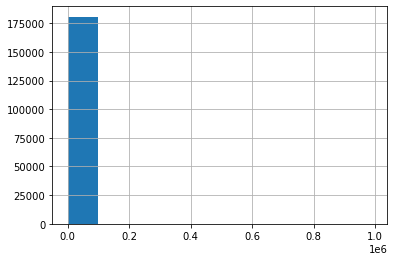

In [261]:
df[df['Co_PPM'] >=0]['Co_PPM'].hist()

In [263]:
df[df['Co_PPM'] >=0]['Co_PPM'].describe()

count    180833.000000
mean        608.019784
std       17602.877511
min           0.000000
25%          13.000000
50%          46.000000
75%         100.000000
max      990000.000000
Name: Co_PPM, dtype: float64

Still does not seem reasonable. 

We change negative numbers to 0 for the CMs of interest. 

In [268]:
df.loc[df['Ge_PPM'] < 0, ['Ge_PPM']] = 0
df.loc[df['In_PPM'] < 0, ['In_PPM']] = 0
df.loc[df['Co_PPM'] < 0, ['Co_PPM']] = 0

### Correlations

In [269]:
#only ppm columns
df_ppm = df.filter(like='PPM')

In [270]:
#only keep relevant rows where CM quantity > 0
df_has_ge = df_ppm[df_ppm['Ge_PPM'] > 0]
df_has_in = df_ppm[df_ppm['In_PPM'] > 0]
df_has_co = df_ppm[df_ppm['Co_PPM'] > 0]

In [271]:
#remove columns where there is only one unique value all throughout (-9999)
df_has_ge = df_has_ge.loc[:,df_has_ge.nunique()!=1]
df_has_in = df_has_in.loc[:,df_has_in.nunique()!=1]
df_has_co = df_has_co.loc[:,df_has_co.nunique()!=1]

In [162]:
df_has_ge['Zn_PPM'].describe()

count    9.503000e+03
mean     9.310640e+01
std      2.643218e+04
min     -9.999000e+03
25%      1.300000e+01
50%      5.200000e+01
75%      9.000000e+01
max      1.270000e+06
Name: Zn_PPM, dtype: float64

In [163]:
df_has_in['Zn_PPM'].describe()

count    1.308900e+04
mean     1.086640e+02
std      2.289835e+04
min     -9.999000e+03
25%      1.700000e+01
50%      5.800000e+01
75%      9.800000e+01
max      1.270000e+06
Name: Zn_PPM, dtype: float64

In [164]:
df_has_co['Co_PPM'].describe()

count    1.708990e+05
mean     3.214425e+03
std      1.884751e+05
min      1.000000e-04
25%      1.600000e+01
50%      5.000000e+01
75%      1.030000e+02
max      3.340000e+07
Name: Co_PPM, dtype: float64

In [97]:
df_has_ge.shape

(9503, 107)

In [98]:
df_has_in.shape

(13089, 108)

In [99]:
df_has_co.shape

(170899, 130)

In [272]:
corr_ge = df_has_ge.corr()
corr_in = df_has_in.corr()
corr_co = df_has_co.corr()

#### Germanium

##### Keep all values even negative

In [138]:
corr_ge['Ge_PPM'].sort_values()[1:20]

Ag_PPM      -0.070026
Mn_PPM      -0.066850
Fe_PPM      -0.064667
B_PPM       -0.059223
Au_PPM      -0.059197
Ni_PPM      -0.057905
Na_PPM      -0.056810
Ti_PPM      -0.056581
Zr_PPM      -0.051846
Ca_PPM      -0.047968
Mg_PPM      -0.043618
Y_PPM       -0.041072
La_PPM      -0.028666
Al_PPM      -0.027490
Pb208_PPM   -0.019357
Te_PPM      -0.019210
Pb206_PPM   -0.018743
Pb207_PPM   -0.018743
Pb204_PPM   -0.018743
Name: Ge_PPM, dtype: float64

In [139]:
corr_ge['Ge_PPM'].sort_values()[-20:]

Er_PPM       0.133056
BaO_PPM      0.135147
Eu_PPM       0.135973
V2O5_PPM     0.138611
Cd_PPM       0.142750
LOI_PPM      0.150649
U3O8_PPM     0.161581
Sb2O3_PPM    0.172649
Ta2O5_PPM    0.172649
Nb2O5_PPM    0.172649
ZrO2_PPM     0.178065
PbO_PPM      0.183525
CuO_PPM      0.183725
C_PPM        0.191026
NiO_PPM      0.216557
As2O3_PPM    0.216733
ZnO_PPM      0.217116
In_PPM       0.219875
CO2_PPM      0.288816
Ge_PPM       1.000000
Name: Ge_PPM, dtype: float64

In [165]:
only_minedex_ge = df_has_ge[['Ge_PPM','Ni_PPM', 'Cu_PPM', 'Pd_PPM', 'Au_PPM', 'Pt_PPM', 'Rh_PPM', 'Fe_PPM', 'S_PPM', 'Ag_PPM', 'Zn_PPM']].corr()

In [166]:
only_minedex_ge['Ge_PPM'].sort_values()

Ag_PPM   -0.070026
Fe_PPM   -0.064667
Au_PPM   -0.059197
Ni_PPM   -0.057905
Zn_PPM   -0.008620
Cu_PPM   -0.008352
S_PPM    -0.004557
Pt_PPM   -0.002987
Pd_PPM   -0.000460
Rh_PPM   -0.000405
Ge_PPM    1.000000
Name: Ge_PPM, dtype: float64

Very low correlations with the Minedex elements. 

<AxesSubplot:>

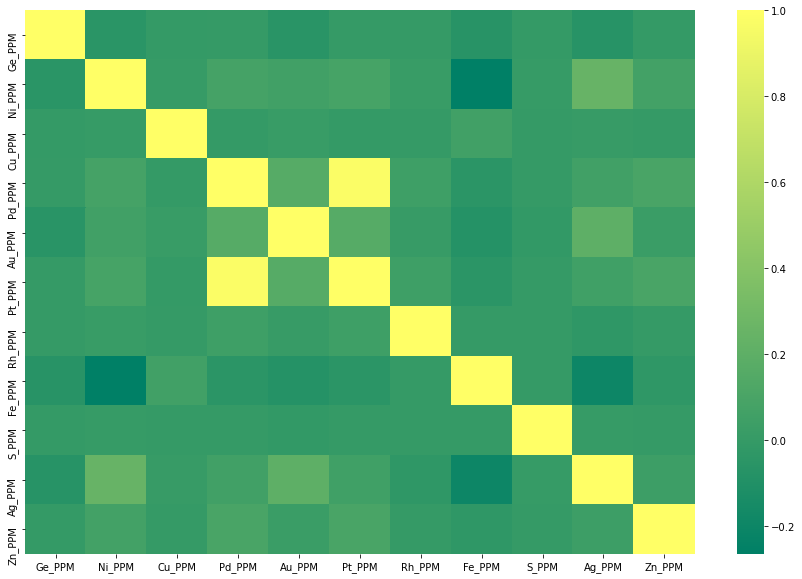

In [167]:
plt.figure(figsize=(15,10))

# plot the heatmap
sns.heatmap(only_minedex_ge,
        cmap='summer')

##### Change all negative values to 0

In [180]:
df_has_ge.isna().sum().sum()

0

In [178]:
#check number of values that were negative
df_has_ge.mask(df_has_ge<0).isna().sum().sort_values()

In_PPM          0
Ge_PPM          0
Co_PPM          0
Ga_PPM        529
Cu_PPM        551
             ... 
Ta2O5_PPM    9501
Rh_PPM       9502
Os_PPM       9502
FeO_PPM      9502
Nb2O5_PPM    9503
Length: 107, dtype: int64

There's only 9504 rows and some columns mostly have negative values all throughout.

In [182]:
#make negative values 0s to check if corr change much
new_df_has_ge = df_has_ge.mask(df_has_ge<0).fillna(0)

In [183]:
new_corr_ge = new_df_has_ge.corr()

In [184]:
new_corr_ge['Ge_PPM'].sort_values()[1:20]

Na_PPM      -0.056811
Ti_PPM      -0.056607
Ca_PPM      -0.047969
Mg_PPM      -0.043620
Mn_PPM      -0.038237
Ni_PPM      -0.037206
Sr_PPM      -0.037122
Cr_PPM      -0.034862
La_PPM      -0.032361
Sc_PPM      -0.032109
Hg_PPM      -0.028547
B_PPM       -0.027676
Al_PPM      -0.027491
Ce_PPM      -0.016646
Pb208_PPM   -0.015061
Pb206_PPM   -0.014883
Pb204_PPM   -0.014474
Pb207_PPM   -0.014461
Li_PPM      -0.013028
Name: Ge_PPM, dtype: float64

In [185]:
new_corr_ge['Ge_PPM'].sort_values()[-20:]

Sb2O3_PPM    0.169296
Th_PPM       0.181894
NiO_PPM      0.188182
Se_PPM       0.190532
Ba_PPM       0.192911
Ho_PPM       0.195373
Tb_PPM       0.198335
C_PPM        0.218765
In_PPM       0.219875
Mo_PPM       0.226454
ZnO_PPM      0.252037
Sn_PPM       0.253025
Hf_PPM       0.263280
U_PPM        0.299020
As2O3_PPM    0.310935
U3O8_PPM     0.385815
CO2_PPM      0.397459
Dy_PPM       0.421230
Ge_PPM       1.000000
Nb2O5_PPM         NaN
Name: Ge_PPM, dtype: float64

#### Only keep rows where Zn is > 0 & make other negative values 0

In [232]:
new_df_has_ge = df_has_ge[df_has_ge['Zn_PPM']>0]

<AxesSubplot:>

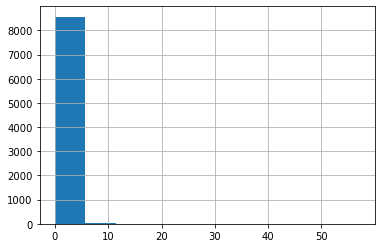

In [233]:
new_df_has_ge['Ge_PPM'].hist()

In [238]:
new_df_has_ge['Ge_PPM'].describe()

count    8608.000000
mean        0.767324
std         1.558500
min         0.000250
25%         0.160000
50%         0.300000
75%         1.020000
max        57.100000
Name: Ge_PPM, dtype: float64

In [212]:
new_df_has_ge.isna().sum().sum()

0

In [213]:
new_df_has_ge = new_df_has_ge.mask(new_df_has_ge<0).fillna(0)

In [215]:
new_corr_ge = new_df_has_ge.corr()

In [217]:
new_corr_ge['Ge_PPM'].sort_values()[1:20]

Fe_PPM      -0.055308
Ti_PPM      -0.050861
Al_PPM      -0.049965
Na_PPM      -0.046179
B_PPM       -0.042246
Ni_PPM      -0.040127
La_PPM      -0.039345
Cr_PPM      -0.039175
Mn_PPM      -0.037189
Sr_PPM      -0.035817
Mg_PPM      -0.035032
Hg_PPM      -0.034647
Ca_PPM      -0.034198
WO3_PPM     -0.026694
Sc_PPM      -0.025835
Pb206_PPM   -0.016296
Pb208_PPM   -0.015866
Pb204_PPM   -0.015848
Pb207_PPM   -0.015834
Name: Ge_PPM, dtype: float64

In [218]:
new_corr_ge['Ge_PPM'].sort_values()[-20:]

Gd_PPM       0.168648
Cd_PPM       0.171263
Eu_PPM       0.187429
In_PPM       0.191454
ZnO_PPM      0.204938
Ho_PPM       0.224076
Tb_PPM       0.224223
Sn_PPM       0.233442
C_PPM        0.243359
Mo_PPM       0.246472
As2O3_PPM    0.307676
U_PPM        0.314638
U3O8_PPM     0.420458
CO2_PPM      0.433152
Dy_PPM       0.469536
Ge_PPM       1.000000
F_PPM             NaN
Nb2O5_PPM         NaN
Sb2O3_PPM         NaN
Ta2O5_PPM         NaN
Name: Ge_PPM, dtype: float64

#### Indium

##### Keep all values even negative

In [149]:
corr_in['In_PPM'].sort_values()[1:20]

Ni_PPM   -0.056578
Bi_PPM   -0.051763
Sn_PPM   -0.045450
Sr_PPM   -0.044837
Y_PPM    -0.042394
V_PPM    -0.042381
Zr_PPM   -0.041743
W_PPM    -0.041447
Tl_PPM   -0.039681
Ag_PPM   -0.037944
Nb_PPM   -0.036144
Be_PPM   -0.033985
Pb_PPM   -0.029148
Se_PPM   -0.028662
Ga_PPM   -0.027231
U_PPM    -0.026795
Th_PPM   -0.025877
Cs_PPM   -0.025805
Sc_PPM   -0.025690
Name: In_PPM, dtype: float64

In [150]:
corr_in['In_PPM'].sort_values()[-20:]

SrO_PPM     -0.000311
Cu_PPM      -0.000245
Lu2O3_PPM   -0.000196
ThO2_PPM    -0.000196
F_PPM       -0.000190
P_PPM        0.000042
Mn_PPM       0.000484
Cr_PPM       0.002274
La_PPM       0.003848
Cd_PPM       0.003985
Sb_PPM       0.004687
As_PPM       0.005047
Ta_PPM       0.007156
Rb_PPM       0.009183
Au_PPM       0.012308
Si_PPM       0.012603
Lu_PPM       0.029615
Hg_PPM       0.056544
B_PPM        0.890991
In_PPM       1.000000
Name: In_PPM, dtype: float64

In [168]:
only_minedex_in = df_has_in[['In_PPM','Ni_PPM', 'Cu_PPM', 'Pd_PPM', 'Au_PPM', 'Pt_PPM', 'Rh_PPM', 'Fe_PPM', 'S_PPM', 'Ag_PPM', 'Zn_PPM']].corr()

In [169]:
only_minedex_in['In_PPM'].sort_values()

Ni_PPM   -0.056578
Ag_PPM   -0.037944
Zn_PPM   -0.006824
Pd_PPM   -0.003921
Pt_PPM   -0.003912
Fe_PPM   -0.002740
S_PPM    -0.000523
Rh_PPM   -0.000392
Cu_PPM   -0.000245
Au_PPM    0.012308
In_PPM    1.000000
Name: In_PPM, dtype: float64

<AxesSubplot:>

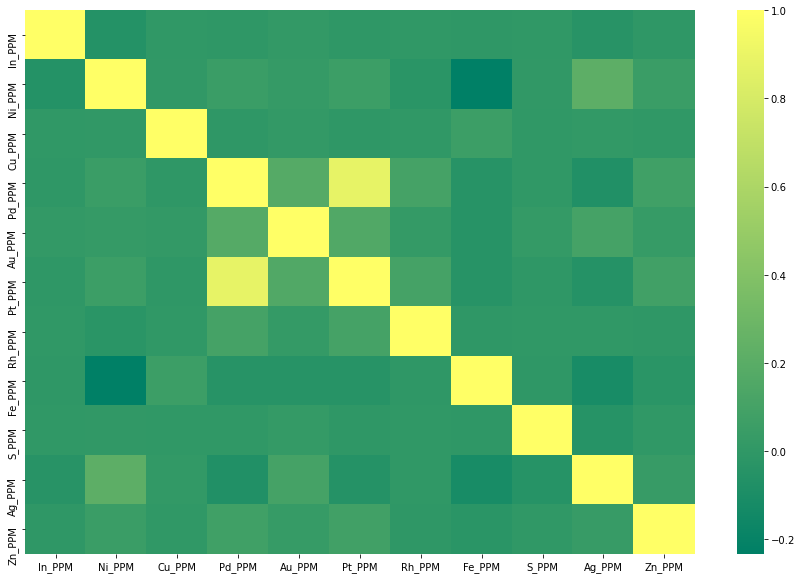

In [170]:
plt.figure(figsize=(15,10))

# plot the heatmap
sns.heatmap(only_minedex_in,
        cmap='summer')

##### Change all negative values to 0

In [186]:
df_has_in.isna().sum().sum()

0

In [187]:
#check number of values that were negative
df_has_in.mask(df_has_in<0).isna().sum().sort_values()

Ge_PPM           0
Co_PPM           0
In_PPM           0
Cu_PPM         786
Mo_PPM         955
             ...  
Ir_PPM       13086
CuO_PPM      13086
Nb2O5_PPM    13087
Lu2O3_PPM    13087
ThO2_PPM     13087
Length: 108, dtype: int64

In [200]:
#make negative values 0s to check if corr change much
new_df_has_in = df_has_in.mask(df_has_in<0).fillna(0)

In [201]:
new_corr_in = new_df_has_in.corr()

In [202]:
new_corr_in['In_PPM'].sort_values()[1:20]

Sc_PPM      -0.013556
Zr_PPM      -0.013180
Y_PPM       -0.011185
Sr_PPM      -0.010938
Rb_PPM      -0.009443
Co_PPM      -0.006744
Ni_PPM      -0.005842
Gd_PPM      -0.005813
Nd_PPM      -0.004906
Yb_PPM      -0.004739
V_PPM       -0.004506
SiO2_PPM    -0.004505
Al2O3_PPM   -0.004478
Eu_PPM      -0.004172
LOI_PPM     -0.003818
CaO_PPM     -0.003812
Na2O_PPM    -0.003661
Mn_PPM      -0.003636
Ho_PPM      -0.003619
Name: In_PPM, dtype: float64

In [203]:
new_corr_in['In_PPM'].sort_values()[-20:]

Ru_PPM      -0.000213
U3O8_PPM    -0.000213
Lu2O3_PPM   -0.000196
Ir_PPM      -0.000194
F_PPM       -0.000188
CuO_PPM     -0.000183
CO2_PPM     -0.000182
ThO2_PPM    -0.000158
Os_PPM      -0.000156
Nb2O5_PPM   -0.000156
Ba_PPM       0.000578
Au_PPM       0.005124
Se_PPM       0.006116
Hf_PPM       0.006454
Ta_PPM       0.007084
Th_PPM       0.009373
Hg_PPM       0.019729
Lu_PPM       0.312714
B_PPM        0.999825
In_PPM       1.000000
Name: In_PPM, dtype: float64

#### Only keep rows where Zn is > 0 & make other negative values 0

In [219]:
new_df_has_in = df_has_in[df_has_in['Zn_PPM']>0]

<AxesSubplot:>

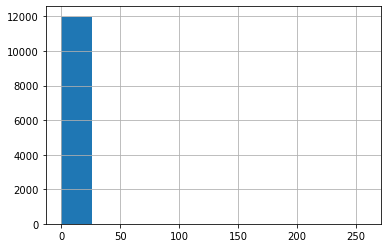

In [234]:
new_df_has_in['In_PPM'].hist()

In [237]:
new_df_has_in['In_PPM'].describe()

count    12019.000000
mean         0.398788
std          6.007683
min          0.000050
25%          0.029000
50%          0.050000
75%          0.079000
max        258.000000
Name: In_PPM, dtype: float64

In [220]:
new_df_has_in.isna().sum().sum()

0

In [221]:
new_df_has_in = new_df_has_in.mask(new_df_has_in<0).fillna(0)
new_corr_in = new_df_has_in.corr()

In [222]:
new_corr_in['In_PPM'].sort_values()[1:20]

Sc_PPM      -0.042151
Zr_PPM      -0.038611
Sr_PPM      -0.036480
Rb_PPM      -0.031116
Y_PPM       -0.028326
Th_PPM      -0.024954
Ni_PPM      -0.018690
SiO2_PPM    -0.016420
Al2O3_PPM   -0.016391
CaO_PPM     -0.014805
LOI_PPM     -0.014102
Na2O_PPM    -0.014014
P2O5_PPM    -0.013610
MgO_PPM     -0.013557
K2O_PPM     -0.012416
Fe2O3_PPM   -0.012083
MnO_PPM     -0.011590
C_PPM       -0.010738
BaO_PPM     -0.009145
Name: In_PPM, dtype: float64

In [223]:
new_corr_in['In_PPM'].sort_values()[-20:]

Se_PPM       0.049168
Ba_PPM       0.071432
Sb_PPM       0.099074
Ag_PPM       0.110511
Cr_PPM       0.196093
Be_PPM       0.263999
Pr_PPM       0.273170
Hf_PPM       0.286975
Nb_PPM       0.305197
Mo_PPM       0.319941
Ho_PPM       0.423011
Eu_PPM       0.439411
Sm_PPM       0.481210
Tb_PPM       0.558200
Tm_PPM       0.569317
In_PPM       1.000000
F_PPM             NaN
Nb2O5_PPM         NaN
Sb2O3_PPM         NaN
Ta2O5_PPM         NaN
Name: In_PPM, dtype: float64

#### Cobalt

##### Keep all values even negative

In [277]:
corr_co['Co_PPM'].sort_values()[1:20]

Ba_PPM   -0.015684
Sc_PPM   -0.014122
Be_PPM   -0.012700
Th_PPM   -0.012571
U_PPM    -0.012284
Tl_PPM   -0.012103
Ga_PPM   -0.011767
Ta_PPM   -0.010624
Hf_PPM   -0.010354
Rb_PPM   -0.010273
Ce_PPM   -0.008330
Cs_PPM   -0.007501
Te_PPM   -0.007265
Gd_PPM   -0.006667
Eu_PPM   -0.006663
Tb_PPM   -0.006607
Nd_PPM   -0.006583
Pr_PPM   -0.006563
Yb_PPM   -0.006554
Name: Co_PPM, dtype: float64

In [278]:
corr_co['Co_PPM'].sort_values()[-20:]

Au_PPM      0.007650
CaO_PPM     0.008681
Sr_PPM      0.008840
Rh_PPM      0.012341
Ru_PPM      0.012449
Os_PPM      0.012456
Ir_PPM      0.012745
K2O_PPM     0.023952
MgO_PPM     0.030755
Cu_PPM      0.033266
S_PPM       0.038060
Na2O_PPM    0.040096
Mg_PPM      0.041649
Ni_PPM      0.042263
Cl_PPM      0.047805
BaO_PPM     0.067966
Al_PPM      0.071385
V2O5_PPM    0.085280
Cr_PPM      0.134303
Co_PPM      1.000000
Name: Co_PPM, dtype: float64

In [279]:
only_minedex_co = df_has_co[['Co_PPM','Ni_PPM', 'Cu_PPM', 'Pd_PPM', 'Au_PPM', 'Pt_PPM', 'Rh_PPM', 'Fe_PPM', 'S_PPM', 'Ag_PPM', 'Zn_PPM']].corr()

In [280]:
only_minedex_co['Co_PPM'].sort_values()

Fe_PPM   -0.002149
Ag_PPM   -0.000577
Pd_PPM    0.000706
Zn_PPM    0.002320
Pt_PPM    0.004095
Au_PPM    0.007650
Rh_PPM    0.012341
Cu_PPM    0.033266
S_PPM     0.038060
Ni_PPM    0.042263
Co_PPM    1.000000
Name: Co_PPM, dtype: float64

<AxesSubplot:>

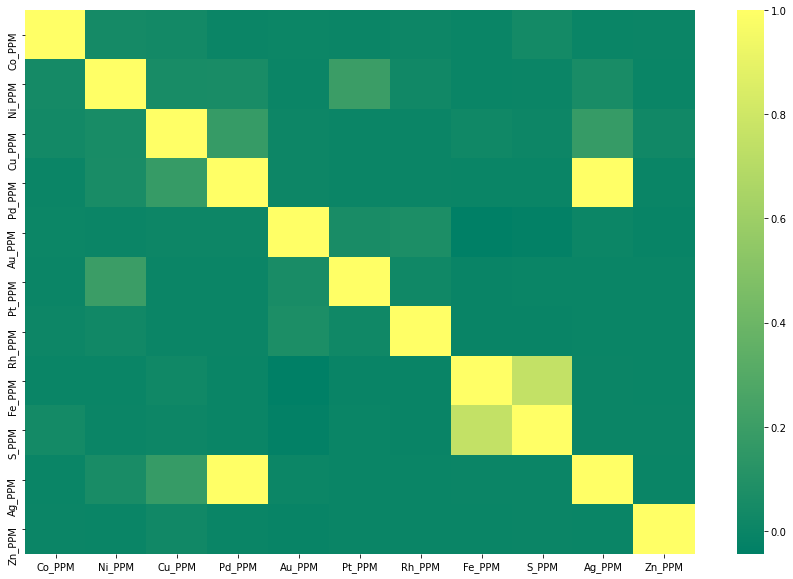

In [281]:
plt.figure(figsize=(15,10))

# plot the heatmap
sns.heatmap(only_minedex_co,
        cmap='summer')

##### Change all negative values to 0

In [282]:
df_has_co.isna().sum().sum()

0

In [283]:
#check number of values that were negative
df_has_co.mask(df_has_co<0).isna().sum().sort_values()

In_PPM            0
Co_PPM            0
Ge_PPM            0
Cu_PPM        12847
Ni_PPM        38593
              ...  
Nb2O5_PPM    170788
H2O_PPM      170794
Br_PPM       170804
CuO_PPM      170805
I_PPM        170807
Length: 130, dtype: int64

In [286]:
#make negative values 0s to check if corr change much
new_df_has_co = df_has_co.mask(df_has_co<0).fillna(0)

In [287]:
new_corr_co = new_df_has_co.corr()
new_corr_co['Co_PPM'].sort_values()[1:20]

V_PPM      -0.008490
Sc_PPM     -0.006269
Rb_PPM     -0.004739
LOI_PPM    -0.004490
Si_PPM     -0.003541
Ge_PPM     -0.003362
LE_PPM     -0.002963
K_PPM      -0.002636
Nb_PPM     -0.002552
Ca_PPM     -0.002321
MgO2_PPM   -0.002288
Fe_PPM     -0.002150
Mo_PPM     -0.002040
ThO2_PPM   -0.002038
Ba_PPM     -0.001970
Nd_PPM     -0.001883
C_PPM      -0.001816
Ag_PPM     -0.001647
TiO2_PPM   -0.001563
Name: Co_PPM, dtype: float64

In [288]:
new_corr_co['Co_PPM'].sort_values()[-20:]

CaO_PPM     0.009761
Au_PPM      0.015837
MgO_PPM     0.030073
K2O_PPM     0.033893
Pd_PPM      0.034754
Cu_PPM      0.035461
S_PPM       0.038358
Zr_PPM      0.039727
Mg_PPM      0.041648
Ni_PPM      0.042357
Na2O_PPM    0.054327
Cl_PPM      0.056918
BaO_PPM     0.069997
Al_PPM      0.071385
Pb_PPM      0.073346
Sr_PPM      0.078506
V2O5_PPM    0.088033
Cr_PPM      0.142108
Co_PPM      1.000000
I_PPM            NaN
Name: Co_PPM, dtype: float64

#### Only keep rows where Cu and Ni is > 0 & make other negative values 0

In [289]:
new_df_has_co = df_has_co[df_has_co['Cu_PPM']>0]
new_df_has_co = new_df_has_co[new_df_has_co['Ni_PPM']>0]

<AxesSubplot:>

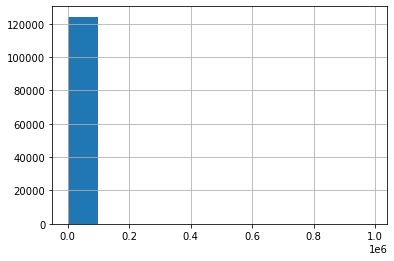

In [290]:
new_df_has_co['Co_PPM'].hist()

In [291]:
new_df_has_co['Co_PPM'].describe()

count    124407.000000
mean        794.756295
std       20295.537551
min           0.000300
25%          20.000000
50%          60.000000
75%         109.000000
max      990000.000000
Name: Co_PPM, dtype: float64

In [292]:
new_df_has_co.isna().sum().sum()

0

In [293]:
new_df_has_co = new_df_has_co.mask(new_df_has_co<0).fillna(0)
new_corr_co = new_df_has_co.corr()

In [294]:
new_corr_co['Co_PPM'].sort_values()[1:20]

V_PPM      -0.012144
Hf_PPM     -0.008888
Sc_PPM     -0.008163
Th_PPM     -0.007057
Rb_PPM     -0.006133
LOI_PPM    -0.005443
Si_PPM     -0.004533
Nb_PPM     -0.004160
Ge_PPM     -0.004155
LE_PPM     -0.003879
Ba_PPM     -0.003218
K_PPM      -0.003156
MgO2_PPM   -0.003112
Ca_PPM     -0.002666
ThO2_PPM   -0.002625
Fe_PPM     -0.002489
Nd_PPM     -0.002301
C_PPM      -0.002217
TiO2_PPM   -0.002085
Name: Co_PPM, dtype: float64

In [295]:
new_corr_co['Co_PPM'].sort_values()[-20:]

CaO_PPM     0.011082
Au_PPM      0.017116
MgO_PPM     0.030591
Cu_PPM      0.036686
Pd_PPM      0.037661
K2O_PPM     0.038577
Zr_PPM      0.041446
S_PPM       0.042065
Ni_PPM      0.043217
Mg_PPM      0.047366
Na2O_PPM    0.059810
BaO_PPM     0.073157
Sr_PPM      0.081863
Cl_PPM      0.083603
Al_PPM      0.089059
V2O5_PPM    0.091988
Pb_PPM      0.095246
Cr_PPM      0.148427
Co_PPM      1.000000
I_PPM            NaN
Name: Co_PPM, dtype: float64